In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gate import AddGate, MultiplyGate, DotGate, BiasGate, SigmoidGate, ReluGate, SoftmaxGate

In [2]:
np.random.seed(1)

In [3]:
def LoadDataSet():
    DataMatrix = []
    LabelList = []
    fr = open('dataset.txt')
    for line in fr.readlines():
        LineArray = line.strip().split()
        DataMatrix.append([float(LineArray[0]), float(LineArray[1])])
        LabelList.append(int(LineArray[2]))
        pass
    DataMatrix = np.mat(DataMatrix)
    DataMatrix = DataMatrix.T
    return DataMatrix, LabelList

### Using Sigmoid

In [4]:
X, Y = LoadDataSet()
Y = np.array(Y)

In [5]:
n,m = np.shape(X)
print(n, m)

2 100


In [6]:
def PlotLine(W, b):
    W = np.array(W)
    DataList = []
    LabelList = []
    fr = open('dataset.txt')
    for line in fr.readlines():
        LineArray = line.strip().split()
        DataList.append([float(LineArray[0]), float(LineArray[1])])
        LabelList.append(int(LineArray[2]))  
    DataArray = np.array(DataList)
    n = np.shape(DataArray)[0]
    Weights = np.squeeze(W)
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(LabelList[i])==1:
            xcord1.append(DataArray[i,0])
            ycord1.append(DataArray[i,1])
        else:
            xcord2.append(DataArray[i,0])
            ycord2.append(DataArray[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x1 = np.arange(-3.0, 3.0, 0.1)
    x2 = np.squeeze(-(b+Weights[0]*x1)/Weights[1])
    ax.plot(x1,x2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    pass

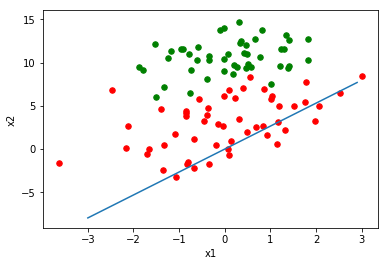

In [7]:
W = np.random.randn(1, n)
b = 0
PlotLine(W, b)

In [8]:
dot = DotGate()
bias = BiasGate()
sigmoid = SigmoidGate()

In [9]:
for i in range(500):
    Q = dot.forward(W, X)
    Z = bias.forward(Q, b)
    A = sigmoid.forward(Z)
    logprobs = np.multiply(-np.log(A),Y) + \
    np.multiply(-np.log(1 - A), 1 - Y)
    cost = 1.0/m * np.nansum(logprobs)
    cost = np.squeeze(cost)
    dA = 1.0/m * (-(Y/A) + (1-Y)/(1-A))
    dZ = sigmoid.backward(dA)
    dQ, db = bias.backward(dZ)
    dW, _ = dot.backward(dQ)
    W = W - 0.1*dW
    b = b - 0.1*db
    if i%10==0:
        print(cost)
        pass
    pass

1.1713167375551758
0.7258378050791207
0.6268198484195384
0.5483875624012857
0.48879718707109154
0.4447689825269107
0.41240859453052847
0.38816262548259106
0.36933749581458053
0.35412064849251
0.3413640632203403
0.33035299072742746
0.32063744846354136
0.31192597942597755
0.30402246131516614
0.29678920509523543
0.29012536164763686
0.2839541144017677
0.27821492372096013
0.2728587070055401
0.26784475251924283
0.2631386778183165
0.2587110323955335
0.25453630810552713
0.25059221513344504
0.24685913613791502
0.24331970365905203
0.23995846541539503
0.23676161408956123
0.23371676569559277
0.23081277541324371
0.22803958291171925
0.2253880812898901
0.2228500052073582
0.22041783480114738
0.21808471271966387
0.21584437214987454
0.21369107412413854
0.21161955270853178
0.20962496692085586
0.20770285842170622
0.2058491141785366
0.2040599334295584
0.20233179837811502
0.2006614481337345
0.1990458554870586
0.1974822061651163
0.1959678802631229
0.19450043559088945
0.19307759270738545


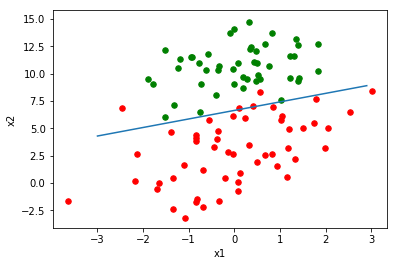

0.19183340517485245


In [10]:
PlotLine(W, b)
print(cost)

### Using Softmax

In [11]:
X, Ys = LoadDataSet()
Ys = np.array(Ys)
Y = []
for y in Ys:
    if y == 0:
        Y.append([1, 0])
        pass
    else:
        Y.append([0, 1])
        pass
    pass
Y = np.array(Y).T

n,m = np.shape(X)
print(Y)

[[1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
  1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0
  1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0
  0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1
  0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0]]


In [12]:
def PlotLine2(W, b):
    W = np.array(W)
    DataList = []
    LabelList = []
    fr = open('dataset.txt')
    for line in fr.readlines():
        LineArray = line.strip().split()
        DataList.append([float(LineArray[0]), float(LineArray[1])])
        LabelList.append(int(LineArray[2]))  
    DataArray = np.array(DataList)
    n = np.shape(DataArray)[0]
    Weights = np.squeeze(W)
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(LabelList[i])==1:
            xcord1.append(DataArray[i,0])
            ycord1.append(DataArray[i,1])
        else:
            xcord2.append(DataArray[i,0])
            ycord2.append(DataArray[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x1 = np.arange(-3.0, 3.0, 0.1)
    x2 = np.squeeze(-((b[0][0]-b[1][0])+(Weights[0][0]-Weights[1][0])*x1)\
                    /(Weights[0][1]-Weights[1][1]))
    ax.plot(x1,x2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    pass

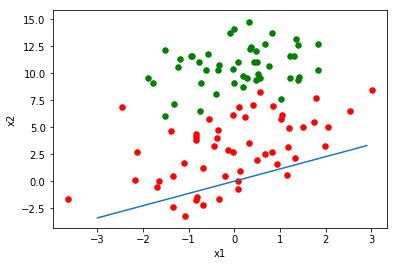

In [13]:
W = np.random.randn(2, n)
b = np.zeros((2, 1))
PlotLine2(W, b)

In [14]:
dot = DotGate()
bias = BiasGate()
softmax = SoftmaxGate()

In [15]:
for i in range(500):
    Q = dot.forward(W, X)
    Z = bias.forward(Q, b)
    A = softmax.forward(Z)
    logprobs = -np.multiply(Y, np.log(A))
    cost = 1.0/m * np.nansum(logprobs)
    cost = np.squeeze(cost)
    dA = 1.0/m * -np.squeeze((Y/A))
    dZ = softmax.backward(dA)
    dQ, db = bias.backward(dZ)
    dW, _ = dot.backward(dQ)
    W = W - 0.05*dW
    b = b - 0.05*db
    if i%10==0:
        print(cost)
        pass
    pass

2.100090459157213
0.6810029911284986
0.5913258742814675
0.5217101989738275
0.46959611093497133
0.43126884332351667
0.4028795947888986
0.3812412313967515
0.364090489569933
0.34995775851713007
0.33792381196146387
0.327414499030662
0.3180635235982792
0.3096289910286089
0.30194442521934245
0.29489021087675726
0.2883767988612171
0.2823346512347451
0.27670807467198233
0.271451328654807
0.2665260894801116
0.26189974054357956
0.25754417909694655
0.25343495496466256
0.24955062908108858
0.24587228214884302
0.2423831290228406
0.23906820979079768
0.23591413804114575
0.23290889283689933
0.2300416448200356
0.2273026094647117
0.2246829222638918
0.2221745318673986
0.21977010807221573
0.21746296221264083
0.21524697798203607
0.21311655108746544
0.21106653642543355
0.20909220169311313
0.20718918653000337
0.20535346643074348
0.20358132078858987
0.20186930452667093
0.20021422285488108
0.19861310875748162
0.19706320287272638
0.19556193547311462
0.19410691029479907
0.1926958899985235


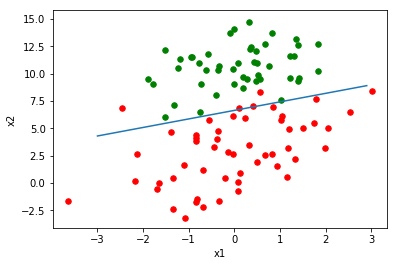

0.19146186445289837


In [16]:
PlotLine2(W, b)
print(cost)